# House Pricing Capstone Project

Author - Dhaval Javia

### Problem Statement:

Hello, My name is Dhaval Javia and I am from India currently working at Infosys. I was thinking to moving abroad and for that first thing you search for when you reach there is House to stay (Of course Food comes first but for now let's keep the hungar  aside.) So i want house on rent which i can afford, so initially price is the factor for me. After i stabilize in the country, i can go for buying a house so i need some sort of system where i can search and compare house rent prices as per neighborhood.  

### Business Model:

By the end of this notebook, we should be able to decide housing prices for neighborhood based on features and location and many other dependent parameters. Main focus of audiance is the person living in State for quite some time and now wants a house of his/her own in a choice of neighborhood.

### Data Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

Following Data will be used to solve the problem at hand.

1. Neighborhood data from Foursquare API
10. Location data from geopy or foursquare API.
20. Pricing dataset with house features.

### Data Sources

We have data available from varius sources but i found this houses on rent price dataset from below sources which requies a lot of data scraping skills and time and processing power. Also, it had all the data avaiable like latitude, longitude, street name, apartment name, rent price, bathrooms and bedrooms.
For extra features, we will use Foursquare API for nearby popular locations.

1. Location data and neighborhood data from Foursquare API
2. Raw datase creation using web scraping from https://www.torontorentals.com/toronto
3. Pair Plots used for correlation. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

### Methodology

Now, first of all, fetching data from website. Yeah its not an easy task especially when there are 5 home groups on a single webpage which has individual links and each group has multiple options of house as per features and price. Phew!

Following details are available in the dataset with description.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
!pip install geocoder
!pip install selenium
!pip install geopy
!pip install pgeocode
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time
!pip install geolocator
!pip install geopy
!pip install geopy
!pip install folium
import json
import re

from geopy.extra.rate_limiter import RateLimiter
import geopy.geocoders as geocoders
from geopy.geocoders import Nominatim

So, what i did is that i used the raw url link and observed it how it is changing with each webpage. So it was quite easy and just neeeded was the for loop of request and response.
Then again i didn't want to increase load on website so i just saved each response in a webpage and then read it from there.

Below is the code used for fetching and saving response or urls.

In [2]:
# all_web_pages = {}
# for i in range(0,260):
#     url = 'https://www.torontorentals.com/toronto?p=' + str(i+1)
#     print(url)
#     all_web_pages[i] = requests.get(url)

In [3]:
# for i in range(0,260):
#     filename = "./htmls/" + str(i) + '.html'
#     print(filename)
#     with open(filename, "w", encoding="utf-8") as f:
#         f.write(all_web_pages[i].text)


Alright, the tricky part, processing htmls and fetching data between SCRIPT HTML tag. and using BeautifulSoup to get the content  inside the tag and using url(inside tag content) to fetch various configurations related to configuration and price.

Once we looped in all the requied data in separate lists. we will create dataframe and save its content in a CSV.
Now the following data takes a long time to run as it searches all urls and extracts requied data. Took about 2 hrs to fetch and format data for all 3000 rows.So we have commented below code to prevent execution again.

We can save data to a dataframe and then export it to CSV.
We will use that CSV for later use and rerun of project.

In [4]:
# from os import listdir

## listing down columns for dataframe and and creating lists to save data in case code didn't ran properly. 
## We can use those lists to append data to dataframe and export it.
# columns = ['ApartmentName','latitude','longitude', 'NoofBedrooms','NoofBathrooms']
# apartname = []
# latitude1 = []
# longi = []
# bedrms = []
# bathrms = []
# priceL = []
# streetnames = []

# #iterating through each html for content
# j = 0
# for each in listdir("./htmls/"):

#     filename = './htmls/' + each
#     with open(filename, "r", encoding="utf-8") as f:
#         response1 = f.read()                 #saving response of each request to response1 var
        
#     #using soap to find script tag in html content
#     soap1 = BeautifulSoup(response1,"html.parser")
#     #soap1
#     script_dump = soap1.find_all("script")
    
#     #3 to -6 is defined after testing and found that all the necessary elements are in range. Although -1 contains all location,
#     # and other url infos which we could have used, but Meh. Ma Project, Ma rules!!!.
    
#     #iterating through each script html tag
#     for group in script_dump[3:-6]:
#         test1 = group
#         test2 = BeautifulSoup(test1.text,"html.parser")
        
#         #saving all necessary things like name, location, streetname, price, apartment type blah blah.
#         newDictionary=json.loads(test2.text)
#         NameofApartment = newDictionary['name']
#         streetAddress = newDictionary['address']['streetAddress']
#         print('---------------ApartMent Name:- ',NameofApartment,"------------------")
        
#         #getting url for the group and fetching more data from there like price, apartment type, no of bathrooms, etc.
#         response2 = requests.get(newDictionary['url'])
#         sub_soap = BeautifulSoup(response2.text,"html.parser")
#         sub_soap
#         table = sub_soap.find_all('td')
#         price_lst = sub_soap.find_all('td',{"class": "price"})
#         beds_lst = sub_soap.find_all('td',{"class": "beds"})
#         baths_lst = sub_soap.find_all('td',{"class": "baths"})
#         beds_lst = sub_soap.find_all('td',{"class": "baths"})
#         print(len(price_lst))
#         #print("Table:-- ", table)
#         #print((len(table)//5)*5)
#         #print(table)
#         for i in range(0,len(price_lst)):
            
# #             beds = BeautifulSoup((table[i+1]).text,"html.parser")
# #             bath = BeautifulSoup((table[i+2]).text,"html.parser")
# #             price = BeautifulSoup((table[i+3]).text,"html.parser")
# #             #price = str(price).split('\n')[1]
# #             print(newDictionary['url'])
#             beds = beds_lst[i].text.replace('\n','')
#             bath = baths_lst[i].text.replace('\n','')
#             price = price_lst[i].text.replace('\n','')
#             print("No of bedrooms are {}, No of bathrooms are {}, Price is {}".format(beds,bath,price))
#             apartname.append(NameofApartment)
#             streetnames.append(streetAddress)
#             priceL.append(price)
#             bedrms.append(beds)
#             bathrms.append(bath)
#             #latitude1.append(latitude)
#             #longi.append(longitude)
            
#             #saving all data in CSV and dataframe
#             #print({'ApartmentName':NameofApartment,'latitude':latitude,'longitude':longitude,'NoofBedrooms':beds,'NoofBathrooms':bath,'Price':price})


In [5]:
# #appending data to dataframe and saving it in a file.
# type(priceL)
# columns = ['ApartmentName', 'Streetname' , 'NoofBedrooms','NoofBathrooms', 'Price']
# print(columns)
# df = pd.DataFrame(columns=columns)
# df['Price'] = priceL
# df['ApartmentName'] = apartname
# df['NoofBathrooms'] = bathrms
# df['NoofBedrooms'] = bedrms
# #df['latitude'] = latitude1
# #df['longitude'] = longi
# df['Streetname'] = streetnames
# #df = df.append({'ApartmentName':NameofApartment,'latitude':latitude,'longitude':longitude,'NoofBedrooms':beds,'NoofBathrooms':bath,'Price':price},ignore_index=True)
# df.head()


In [6]:
#df.to_csv('./raw_df.csv')

In [7]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
0,0,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,000",43.66018,-79.50995,Kingsway South
1,1,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,300",43.66018,-79.50995,Kingsway South
2,2,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$2,700",43.66018,-79.50995,Kingsway South
3,3,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$3,850",43.66018,-79.50995,Kingsway South
4,4,eCentral,15 Roehampton Ave,1.0,1.0,"$2,002.5",43.70794,-79.39786,Mt Pleasant West


Reading CSV we saved in previous step and removing  unnamed index column

In [8]:
#str(price).split('\n')[1]
#df = pd.read_csv('./raw_df.csv',index_col=None)
df.drop('Unnamed: 0',inplace=True,axis=1)
df.reset_index(drop=True)

df.head()

,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
0,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,000",43.66018,-79.50995,Kingsway South
1,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,300",43.66018,-79.50995,Kingsway South
2,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$2,700",43.66018,-79.50995,Kingsway South
3,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$3,850",43.66018,-79.50995,Kingsway South
4,eCentral,15 Roehampton Ave,1.0,1.0,"$2,002.5",43.70794,-79.39786,Mt Pleasant West


In [9]:
df.shape

(2705, 8)

Finding neighborhood based on Streetaddress and for failed ones, appending it to list for later use. Although after the execution of the code, it was found that some neighborhood data was incorrect and  later next step was used to fix some of those and find NA Neighborhooods data.

In [10]:
#url = 'http://dev.virtualearth.net/REST/v1/Locations/CA/-/-/-/{}?&includeNeighborhood=1&key=AutK2PfFsISHtjUQr00rl2Kf_5tlpgYPtZzJUBZnwl8_NyIOydqyWW91RS4N7NQQ'
# df['Neighborhood'] = ''
# ignored = []
# for Streetname in df.Streetname.unique():
#     try:
#         url = 'http://dev.virtualearth.net/REST/v1/Locations/CA/-/-/-/{}?&includeNeighborhood=1&key=AutK2PfFsISHtjUQr00rl2Kf_5tlpgYPtZzJUBZnwl8_NyIOydqyWW91RS4N7NQQ'
#         url = url.format(Streetname.split(' | ')[0].replace(' ','%20'))
#         response = requests.get(url)
#         response = response.json()
#         print(response['resourceSets'][0]['resources'][0]['address']['neighborhood'])
#         print(response['resourceSets'][0]['resources'][0]['point']['coordinates'][0])
#         print(response['resourceSets'][0]['resources'][0]['point']['coordinates'][1])
#         print('')
#         df['Neighborhood'][df['Streetname'] == Streetname] = response['resourceSets'][0]['resources'][0]['address']['neighborhood']
#         df['Latitude'][df['Streetname'] == Streetname] = response['resourceSets'][0]['resources'][0]['point']['coordinates'][0]
#         df['longitude'][df['Streetname'] == Streetname] = response['resourceSets'][0]['resources'][0]['point']['coordinates'][1]
#     except:
#         ignored.append(Streetname)
    

Finding data for NA Neighborhooods via Bing API.

In [11]:
# responses = []
# for each in df[df.Latitude.isnull()].Streetname.unique():
#     print(each.split(' | ')[0])
#     try:
#         url = 'http://dev.virtualearth.net/REST/v1/Locations/CA/-/-/-/{}?&includeNeighborhood=1&key=AutK2PfFsISHtjUQr00rl2Kf_5tlpgYPtZzJUBZnwl8_NyIOydqyWW91RS4N7NQQ'

#         url = url.format((each.split(' | ')[0]).replace(' ','%20'))
#         response = requests.get(url)
#         response = response.json()
#         latitude = response['resourceSets'][0]['resources'][0]['point']['coordinates'][0]
#         neighborhood = response['resourceSets'][0]['resources'][0]['address']['locality']
#         longitude = response['resourceSets'][0]['resources'][0]['point']['coordinates'][1]

#         df['Neighborhood'][df['Streetname'] == each] = neighborhood
#         df['Latitude'][df['Streetname'] == each] = latitude
#         df['longitude'][df['Streetname'] == each] = longitude
#     except:
#         responses.append(response)

# #df['Neighborhood'][df['Streetname'] == Streetname] = a

Dropping rows if any columnn has NA value(s).

In [12]:
# df.dropna(axis=0,inplace=True)
# df.head()
# df.to_csv('./raw_df.csv')

Ok, Now our data looks like this.

In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
# The code was removed by Watson Studio for sharing.

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
# The code was removed by Watson Studio for sharing.

In [17]:
df.head()

,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
0,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,000",43.66018,-79.50995,Kingsway South
1,571 Prince Edward Dr N,571 Prince Edward Dr N,1.0,1.0,"$2,300",43.66018,-79.50995,Kingsway South
2,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$2,700",43.66018,-79.50995,Kingsway South
3,571 Prince Edward Dr N,571 Prince Edward Dr N,2.0,2.0,"$3,850",43.66018,-79.50995,Kingsway South
4,eCentral,15 Roehampton Ave,1.0,1.0,"$2,002.5",43.70794,-79.39786,Mt Pleasant West


Let's see what we are dealing with.(Even though we extracted data via webscraping and BING API so we already do know the data, but whatever!)

1. We have ApartmentName, apartment configs like no of bedrooms, noofbathrooms, price, and other parameters like streetname and location parameters, neighborhoods extracted from Streetname.

2. Now, what is the most important data here. As per my understaning, neighborhood and average pricing based on features is. We will see how this can be used as we progress further.

3. Dependent variable(Price) is changing(increasing) as bedrooms and bathrooms( but more effect because of bedrooms variable).
We need to co

In [18]:
import folium
toronto_map = folium.Map(location=[43.6532,-79.3832],zoom_start=12)
toronto_map

In [19]:
for lat,lon, street, apt in zip(df['Latitude'], df['longitude'], df['Streetname'], df['ApartmentName']):
    #print("Borough - {}, Neighbourhood - {}, latitude - {}, longitude - {}".format(borough,neighbourhood,lat,lon))
    try:
        label = folium.Popup(apt,parse_html=True)

        folium.CircleMarker(
            location=[lat,lon],
            color = 'red',
            radius = 5,
            popup=label,
            parse_html = True).add_to(toronto_map)
    except:
        pass
display(toronto_map)

In [20]:
df.dtypes

ApartmentName     object
Streetname        object
NoofBedrooms     float64
NoofBathrooms    float64
Price             object
Latitude         float64
longitude        float64
Neighborhood      object
dtype: object

In [21]:
df.replace({'Price':'\$'},{'Price':''},regex=True,inplace=True)

In [22]:
df.replace({'Price':','},{'Price':''},regex=True,inplace=True)

In [23]:
df['Price'].astype('float64')

ValueError: could not convert string to float: 'Inquire'

In [24]:
df = df[df['Price'] != 'Inquire']

In [25]:
df['Price'] = df.Price.astype('float64')

In [26]:
df.dtypes

ApartmentName     object
Streetname        object
NoofBedrooms     float64
NoofBathrooms    float64
Price            float64
Latitude         float64
longitude        float64
Neighborhood      object
dtype: object

In [27]:
df.Price.describe()

count     2689.000000
mean      2530.569394
std       1054.788000
min          1.000000
25%       2000.000000
50%       2350.000000
75%       2780.000000
max      19500.000000
Name: Price, dtype: float64

This Min value of 1 seems to be incorrect. (Not seems to be, it is incorrect. Who rents house at 1$. is it a Apartment on Weed!???). Anyways, we will go ahead and remove this value and see how much is min after that.

In [28]:
df[df['Price'] == 1]

,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
2685,972 Bathurst St,972 Bathurst St | Unit: 1,1.0,1.0,1.0,43.66977,-79.4132,Annex
2686,972 Bathurst St,972 Bathurst St | Unit: 2,1.0,1.0,1.0,43.66977,-79.4132,Annex


Oh, Just 2 values, seems like some sort of error in data gathering. Anyways, we can remove it rather than go back and fetch the values.

In [29]:
df = df[df['Price'] != 1]

In [30]:
df.Price.describe()

count     2687.000000
mean      2532.452214
std       1052.918851
min        575.000000
25%       2000.000000
50%       2350.000000
75%       2784.000000
max      19500.000000
Name: Price, dtype: float64

Hmm, Still something is wrong, oh wait, the MAX Price of rent. Oh my God! 19500!!!?? Are you kidding me?. What Harvy Spector lives here or what. What is it Suits??

In [31]:
df[df['Price'] == 19500]

,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
198,101 Peter St,101 Peter St | Unit: 602,1.0,1.0,19500.0,43.64751,-79.39273,Waterfront Communities-the Island


we will remove it ofcourse. Another Data insertion error it seems.

In [32]:
df = df[df['Price'] != 19500]

In [33]:
df.Price.describe()

count     2686.000000
mean      2526.135182
std       1000.892915
min        575.000000
25%       2000.000000
50%       2350.000000
75%       2780.000000
max      15000.000000
Name: Price, dtype: float64

we will plot graphs to see the outliers.

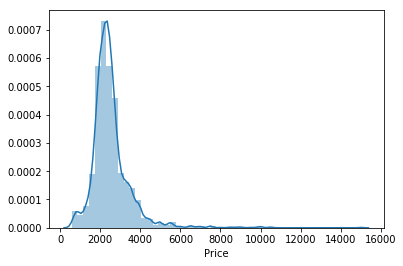

In [34]:
sns.distplot(df['Price'])

We can definitely see some Suits guy living in a wealthy apartments with rents more than 8k per month. Let's see how many houses are there above 8k rent.

In [35]:
df[df['Price'] > 8000]

,ApartmentName,Streetname,NoofBedrooms,NoofBathrooms,Price,Latitude,longitude,Neighborhood
245,Ian Serota,183 Wellington St W,2.5,2.5,10000.0,43.64541,-79.38732,Waterfront Communities-the Island
370,177 Lyndhurst Ave,177 Lyndhurst Ave,4.5,4.5,9800.0,43.68270,-79.41466,Casa Loma
522,68 Merton St,68 Merton St,4.0,4.0,8500.0,43.69683,-79.39395,Mt Pleasant West
620,1 Bedford Rd,1 Bedford Rd | Unit: 1802,2.5,2.5,10000.0,43.66853,-79.39713,Annex
706,311 Bay St,311 Bay St | Unit: 4805,1.0,1.0,10500.0,43.64977,-79.38040,Bay Street Corridor
707,63 St Mary St,63 St Mary St | Unit: Th01,3.0,3.0,10000.0,43.66706,-79.38889,Bay Street Corridor
1084,2095 Lake Shore Blvd W,2095 Lake Shore Blvd W | Unit: 617,1.0,1.0,15000.0,43.62943,-79.47728,Mimico
1165,11 Garnet Ave,11 Garnet Ave,4.5,4.5,10500.0,43.66890,-79.42144,Dovercourt-Wallace Emerson-Junction
1693,2350 Doulton Dr,2350 Doulton Dr,4.5,4.5,9000.0,43.54225,-79.64660,Erindale
1853,17 Mcclinchy Ave,17 Mcclinchy Ave,4.5,4.5,8800.0,43.65776,-79.51323,Kingsway South


Hmm, 2 things to notice here, 
1. there are few apartments with 8k plus rent(when i say few, i meant compared to 3k rows dataset which we have created.) We can probably remove these results from our analysis and i don't see much impact on our analysis too.
2. see the last row? Observe the apartment name. We forgot to modify that column. Let's do that later. Although its just a name and won't have much impact but still it should look good, not some garbage.

In [36]:
df = df[df['Price'] <= 8000]

In [37]:
df.Price.describe()

count    2673.000000
mean     2490.123120
std       852.060509
min       575.000000
25%      2000.000000
50%      2350.000000
75%      2750.000000
max      8000.000000
Name: Price, dtype: float64

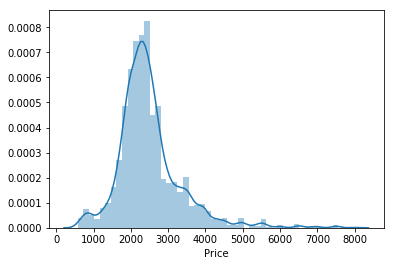

In [38]:
sns.distplot(df['Price'])

Ah, Much Better. Now, if you google enough and know a thing or  2 about the statstics, you will know about skewness. There are 2 kinds of that. Positive and Negative.


<b>Positively skewed data:</b>
If tail is on the right as that of the second image in the figure, it is right skewed data. It is also called positive skewed data.
Common transformations of this data include square root, cube root, and log.
1. Cube root transformation:
    The cube root transformation involves converting x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.
2. Square root transformation:
    Applied to positive values only. Hence, observe the values of column before applying.
3. Logarithm transformation:
    The logarithm, x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

<b>Negatively skewed data:</b>
If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.
Common transformations include square , cube root and logarithmic.
1. Square transformation:
    The square, x to x², has a moderate effect on distribution shape and it could be used to reduce left skewness.

Another method of handling skewness is finding outliers and possibly removing them.

Here, what we have is the positive Skewness data. We can probably use log transform method to fix it. Let's find out if that works or not

In [39]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

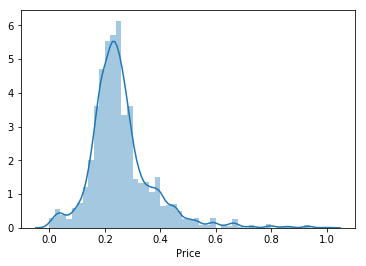

In [47]:
price_norm = normalize(df.Price)
sns.distplot(price_norm)

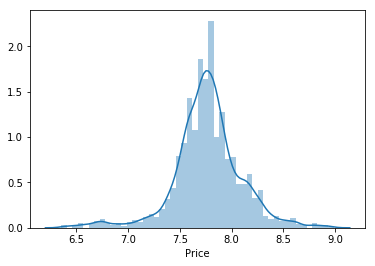

In [48]:
sns.distplot(np.log(df.Price))

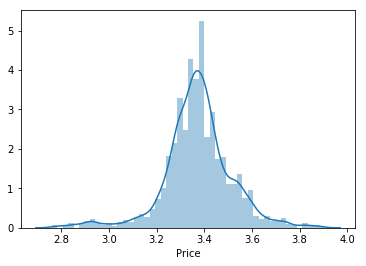

In [44]:
sns.distplot(np.log10(df.Price))

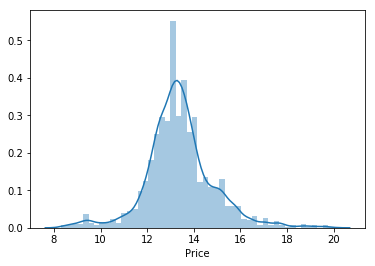

In [46]:
sns.distplot(np.power(df.Price,1/3))

Ah, looks perfect!. Isn't  she a beauty?

We tried log, log10 and normalization of data using min and maximum values but did not work. Which worked for us was the cube root  of the data.(Most of the time it works for highly skewed data)